# 1.0 Project Overview
## 1.1 Introduction

The project aims at drawing insights from the NTSB dataset to determine the kind of aircraft to purchase and operate, commercial and private enterprises  based on the potential risks of different aircrafts. The criteria is finding the aircraft with the lowest risk to recommend. This project will, therefore adopt Cross Industry Standard Prcocedures- Data Mining(CRISP-DM) for the aviation industry.

# 2.0 Business Understanding
## 2.1 Objective

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## 2.2 Empirical Summary
Conventionally, the choice of the aircraft to purchase and operate is guided by various factors. This includes the investor budget, plane type and engine size or configurations, interior and layouts, passengers and business requirements, destinations or routes, operational and maintenance costs, return on investment, and regulatory and safety requirements(https://aircraftmaintenancestands.com/blog, https://skyaviationholdings.com/, https://www.faa.gov/, International Civil Aviation Organization(ICAO))

# 3.0 The Data

The data provided for this analysis is from the National Transportation Safety Board(NTSB) database that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

# Importing python libraries

In [635]:
#importing relevant python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [636]:
# Loading AviationData.csv dataset as data1 dataframe
data1 = pd.read_csv('AviationData.csv', encoding= 'ISO 8859-1')


c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [637]:
# Loading USState_Codes.csv dataset as data2 dataframe
data2 = pd.read_csv('USState_Codes.csv')

# 3.1 Data Understanding

### Preview of data1 dataframe.
Data preview before preparation, serves as familiarization with its features and be able to map out the essential features relevant to the scope of the problem statement. This invokes pertinent questions to draw insights from the data which gives confidence in data-driven decision making that guides business strategic direction.

In [638]:
# # Display of the first 5 rows of the dataframe
data1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [639]:
# Checking dataset information
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [640]:
# Checking features to note the essential ones to answer research question
data1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [641]:
# Concise summary (numerical features)
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [642]:
# Summary of categoricals features
data1.describe(include='object').T

,count,unique,top,freq
Event.Id,88889,87951,20001214X45071,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,DCA22WA204,2
Event.Date,88889,14782,1984-06-30,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25592,332739N,19
Longitude,34373,27156,0112457W,24
Airport.Code,50249,10375,NONE,1488
Airport.Name,52790,24871,Private,240


In [643]:
# shape of the dataframe (rows, cols)
data1.shape

(88889, 31)

In [644]:
data1['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [645]:
data1['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [646]:
data1['Make'].values

array(['Stinson', 'Piper', 'Cessna', ..., 'AMERICAN CHAMPION AIRCRAFT',
       'CESSNA', 'PIPER'], dtype=object)

In [647]:
data1['Model'].values

array(['108-3', 'PA24-180', '172M', ..., '8GCBC', '210N', 'PA-24-260'],
      dtype=object)

In [648]:
for column in data1:
  unique_values = data1[column].unique()
  print(f"Unique values in column '{column}','\n': {unique_values}",'\n')

Unique values in column 'Event.Id','
': ['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513'] 

Unique values in column 'Investigation.Type','
': ['Accident' 'Incident'] 

Unique values in column 'Accident.Number','
': ['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'WPR23LA075' 'WPR23LA076'
 'ERA23LA097'] 

Unique values in column 'Event.Date','
': ['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29'] 

Unique values in column 'Location','
': ['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, '] 

Unique values in column 'Country','
': ['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' '

### Preview of data2 dataframe

In [649]:
# preview data in data2 dataframe
data2.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [650]:
# Checking data information
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


Observation: 
The dataframe has all feature as object dtype

## 3.2 Refining Problem Statement.
My company contemplates a dive into aviation industry but limited in the knowledge and experience in the sector. Conventionally a number of factors are considered in settling on the aircrafts to purchase and operate as seen in the empirical review summary above. 
The objective therefore, is to able to recommend on the kind of aircraft to invest in based on the scope set out. The     
    > Time frame of 1962 to 2023 (Event.Date feature)
    
    > 

## 3.2.1 Metrics of Success

My project will be successful if, using the provided data and scope, be able to find the aircraft of commercial and private enterprises with the lowest risks and make recommend  to aid the investment decision making.

# 4.0 Data Preparation

## 4.1 Data Cleaning
This phase involves checking on data validity(relevance), accuracy(removal of outliers), completeness...

and treatment of missing values and duplicates. Duplicates are removed while missing values are either dropped/deleted if by so doing do not significantly impact on the clean dataset, or values imputed. 

In [651]:
# Making a copy of the dataset
df = data1.copy(deep= True)

In [652]:
# Checking columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

### 4.1.1 Validity check

This achieved by checking irrelevant features and removing them or selecting the revelant features 

In [653]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [654]:
#Selecting the relevant features for analysis
df1 = df[['Event.Date','Investigation.Type','Location','Injury.Severity','Aircraft.damage','Aircraft.Category','Make','Model','Purpose.of.flight','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Broad.phase.of.flight']]
df1.head(2)

,Event.Date,Investigation.Type,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight
0,1948-10-24,Accident,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,Stinson,108-3,Personal,2.0,0.0,0.0,0.0,Cruise
1,1962-07-19,Accident,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,Unknown


In [655]:
#Changing columns to lower case and removing white spaces for uniformity
df1.columns = df1.columns.str.lower().str.replace('.', '_')
df1.columns

Index(['event_date', 'investigation_type', 'location', 'injury_severity',
       'aircraft_damage', 'aircraft_category', 'make', 'model',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'broad_phase_of_flight'],
      dtype='object')

In [656]:
#Rename 'broad.phase.of.flight' column as 'phase.of.flight'
df1.rename(columns = {'broad.phase.of.flight': 'phase.of.flight'}, inplace = True )

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [657]:
df1.columns

Index(['event_date', 'investigation_type', 'location', 'injury_severity',
       'aircraft_damage', 'aircraft_category', 'make', 'model',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'broad_phase_of_flight'],
      dtype='object')

In [658]:
df1.dtypes

event_date                 object
investigation_type         object
location                   object
injury_severity            object
aircraft_damage            object
aircraft_category          object
make                       object
model                      object
purpose_of_flight          object
total_fatal_injuries      float64
total_serious_injuries    float64
total_minor_injuries      float64
total_uninjured           float64
broad_phase_of_flight      object
dtype: object

### 4.1.2 Data completeness

Checking for missing values and treating them. Missing values are either dropped/deleted if by so doing do not significantly impact on the clean dataset, or values imputed.

In [659]:
#Checking for missing values
df1.isna().sum()

event_date                    0
investigation_type            0
location                     52
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
make                         63
model                        92
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
broad_phase_of_flight     27165
dtype: int64

In [660]:
df1['aircraft_category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: aircraft_category, dtype: int64

In [661]:
df1['broad_phase_of_flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: broad_phase_of_flight, dtype: int64

In [662]:
# Fill missing values in aircraft_category and broad_phase_of_flight features with place holder 'Unkown'
df1[['aircraft_category', 'broad_phase_of_flight', 'purpose_of_flight']] = df1[['aircraft_category', 'broad_phase_of_flight','purpose_of_flight']].fillna('Unknown')

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [663]:
df1.isna().sum()

event_date                    0
investigation_type            0
location                     52
injury_severity            1000
aircraft_damage            3194
aircraft_category             0
make                         63
model                        92
purpose_of_flight             0
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
broad_phase_of_flight         0
dtype: int64

In [664]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
total_fatal_injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
total_serious_injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
total_minor_injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
total_uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [665]:
# Imputing null values in numerical features in dataframe df1 using their medians
numerical_features = ['total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured']

#Calculating their medians
medians = df1[numerical_features].median()

# Filling null value with their feature median
df1[numerical_features] = df1[numerical_features].fillna(medians)

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [666]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
total_fatal_injuries,88889.0,0.564761,5.126649,0.0,0.0,0.0,0.0,349.0
total_serious_injuries,88889.0,0.240491,1.434614,0.0,0.0,0.0,0.0,161.0
total_minor_injuries,88889.0,0.309127,2.083715,0.0,0.0,0.0,0.0,380.0
total_uninjured,88889.0,5.037755,26.990914,0.0,0.0,1.0,2.0,699.0


In [667]:
df1.shape

(88889, 14)

In [668]:
df1.isna().sum()

event_date                   0
investigation_type           0
location                    52
injury_severity           1000
aircraft_damage           3194
aircraft_category            0
make                        63
model                       92
purpose_of_flight            0
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
total_uninjured              0
broad_phase_of_flight        0
dtype: int64

In [669]:
# Missing values in other features are significantly low and can be dropped
df1.dropna(inplace=True)

<ipython-input-669-516f9ae57843>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [670]:
df1.isna().sum()

event_date                0
investigation_type        0
location                  0
injury_severity           0
aircraft_damage           0
aircraft_category         0
make                      0
model                     0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
broad_phase_of_flight     0
dtype: int64

In [671]:
df1.head()

,event_date,investigation_type,location,injury_severity,aircraft_damage,aircraft_category,make,model,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,broad_phase_of_flight
0,1948-10-24,Accident,"MOOSE CREEK, ID",Fatal(2),Destroyed,Unknown,Stinson,108-3,Personal,2.0,0.0,0.0,0.0,Cruise
1,1962-07-19,Accident,"BRIDGEPORT, CA",Fatal(4),Destroyed,Unknown,Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,Unknown
2,1974-08-30,Accident,"Saltville, VA",Fatal(3),Destroyed,Unknown,Cessna,172M,Personal,3.0,0.0,0.0,1.0,Cruise
3,1977-06-19,Accident,"EUREKA, CA",Fatal(2),Destroyed,Unknown,Rockwell,112,Personal,2.0,0.0,0.0,0.0,Cruise
4,1979-08-02,Accident,"Canton, OH",Fatal(1),Destroyed,Unknown,Cessna,501,Personal,1.0,2.0,0.0,0.0,Approach


### 4.1.3 Data accuracy

Checking for outlier values in the data that distorts its accuracy. This is mitigated by drop/removing outliers

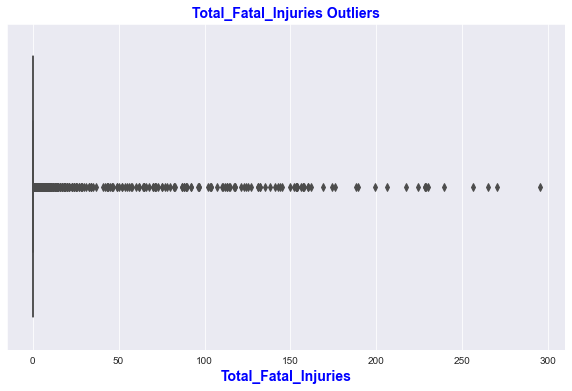

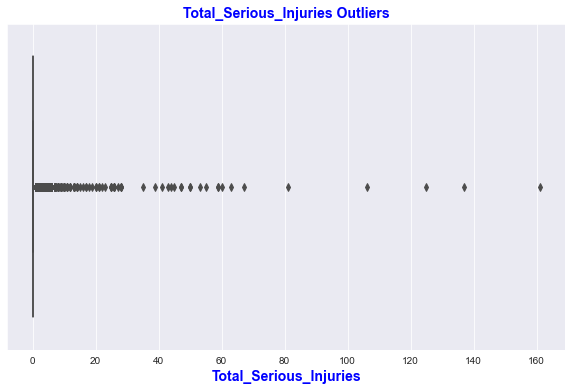

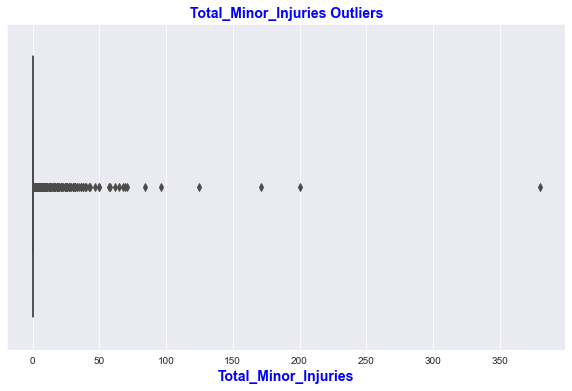

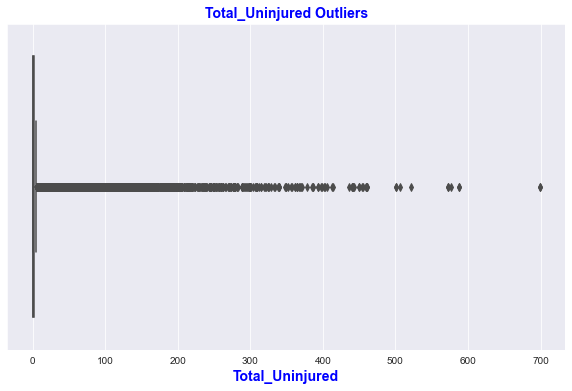

In [672]:
#Checking for outliers visually using plots for numerical features
float_features = df1.select_dtypes(include='float').columns
for feature in float_features:
    plt.figure(figsize= (10,6))
    sns.boxplot(x=df1[feature])

    plt.title(f'{feature} Outliers'.title(), size=14, color='blue', weight='bold')
    plt.xlabel(feature.title(), size=14, color='blue', weight='bold')
    plt.show()


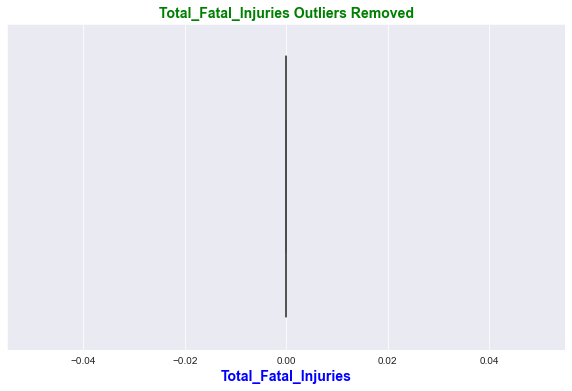

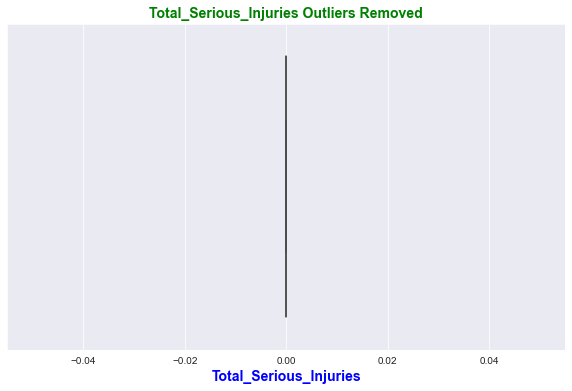

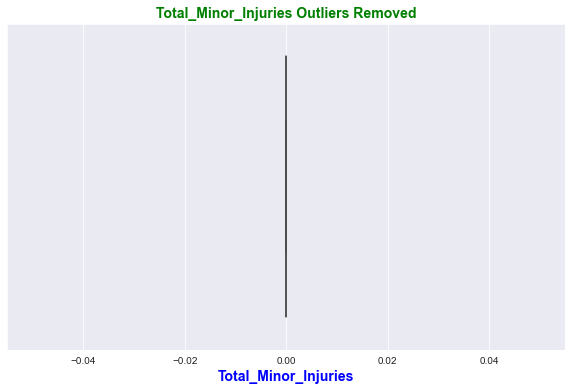

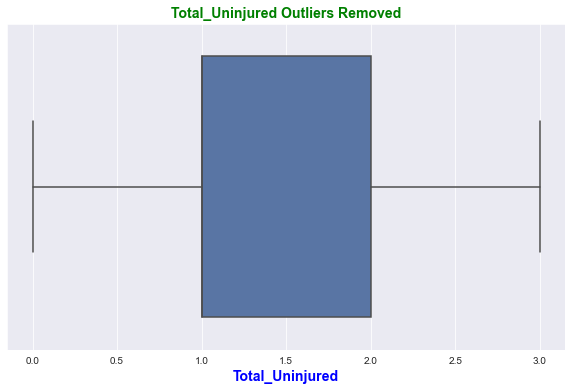

In [673]:
#Using interquartile range to remove the outliers
# Loop over each feature in df1
for feature in float_features:
# Calculate the interquartile range (IQR)
    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

# Filter the data to remove outliers
    df1 = df1[(df1[feature] >= lower_limit) & (df1[feature] <= upper_limit)]

# Check the boxplot again
    plt.figure(figsize= (10,6))
    sns.boxplot(x=df1[feature])

    plt.title(f'{feature} Outliers Removed'.title(), size=14, color='green', weight='bold')
    plt.xlabel(feature.title(), size=14, color='blue', weight='bold')
    plt.show()

In [674]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
total_fatal_injuries,40735.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
total_serious_injuries,40735.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
total_minor_injuries,40735.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
total_uninjured,40735.0,1.543267,0.657648,0.0,1.0,1.0,2.0,3.0


In [675]:
df1.shape

(40735, 14)

### 4.1.4 Data consistency

Consistency is achieved through removal of duplicates in the dataframe

In [676]:
#Checking for duplicates
df1.duplicated().sum()

14

In [677]:
#Removing duplicates
clean_df1=df1.drop_duplicates()

In [678]:
#preview clean_df1
clean_df1

,event_date,investigation_type,location,injury_severity,aircraft_damage,aircraft_category,make,model,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,broad_phase_of_flight
7,1982-01-01,Accident,"PULLMAN, WA",Non-Fatal,Substantial,Airplane,Cessna,140,Personal,0.0,0.0,0.0,2.0,Takeoff
8,1982-01-01,Accident,"EAST HANOVER, NJ",Non-Fatal,Substantial,Airplane,Cessna,401B,Business,0.0,0.0,0.0,2.0,Landing
10,1982-01-01,Accident,"HOBBS, NM",Non-Fatal,Substantial,Unknown,Piper,PA-28-161,Personal,0.0,0.0,0.0,1.0,Approach
11,1982-01-01,Accident,"TUSKEGEE, AL",Non-Fatal,Substantial,Unknown,Beech,V35B,Personal,0.0,0.0,0.0,1.0,Landing
16,1982-01-02,Accident,"MIDWAY, UT",Non-Fatal,Destroyed,Helicopter,Enstrom,280C,Personal,0.0,0.0,0.0,1.0,Taxi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88865,2022-12-12,Accident,"Knoxville, TN",Non-Fatal,Substantial,Airplane,CESSNA,172,Instructional,0.0,0.0,0.0,1.0,Unknown
88869,2022-12-13,Accident,"Lewistown, MT",Non-Fatal,Substantial,Airplane,PIPER,PA42,Unknown,0.0,0.0,0.0,1.0,Unknown
88873,2022-12-14,Accident,"San Juan, PR",Non-Fatal,Substantial,Airplane,CIRRUS DESIGN CORP,SR22,Personal,0.0,0.0,0.0,1.0,Unknown
88876,2022-12-15,Accident,"Wichita, KS",Non-Fatal,Substantial,Airplane,SWEARINGEN,SA226TC,Unknown,0.0,0.0,0.0,1.0,Unknown


### 4.1.5 Data Uniformity

Involves feature engineering

In [679]:
#Required is to filter data within the set time frame on 'Event.Date' attribute
clean_df1['event_date'] = pd.to_datetime(clean_df1['event_date'])


#filtering dataframe within date(1962-2023 range
start_date = '1962-01-01'
end_date = '2023-01-01'

clean_df1=clean_df1.loc[(clean_df1['event_date'] >= start_date) & (clean_df1['event_date'] <= end_date)]

<ipython-input-679-3f9761410ae4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df1['event_date'] = pd.to_datetime(clean_df1['event_date'])


In [680]:
clean_df1.head()

,event_date,investigation_type,location,injury_severity,aircraft_damage,aircraft_category,make,model,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,broad_phase_of_flight
7,1982-01-01,Accident,"PULLMAN, WA",Non-Fatal,Substantial,Airplane,Cessna,140,Personal,0.0,0.0,0.0,2.0,Takeoff
8,1982-01-01,Accident,"EAST HANOVER, NJ",Non-Fatal,Substantial,Airplane,Cessna,401B,Business,0.0,0.0,0.0,2.0,Landing
10,1982-01-01,Accident,"HOBBS, NM",Non-Fatal,Substantial,Unknown,Piper,PA-28-161,Personal,0.0,0.0,0.0,1.0,Approach
11,1982-01-01,Accident,"TUSKEGEE, AL",Non-Fatal,Substantial,Unknown,Beech,V35B,Personal,0.0,0.0,0.0,1.0,Landing
16,1982-01-02,Accident,"MIDWAY, UT",Non-Fatal,Destroyed,Helicopter,Enstrom,280C,Personal,0.0,0.0,0.0,1.0,Taxi


In [681]:
clean_df1['make'] = clean_df1['make'].str.title()

In [682]:
clean_df1['make'].value_counts()

Cessna                          14599
Piper                            7274
Beech                            2197
Bell                             1055
Grumman                           717
                                ...  
Grumman American Aviation           1
Bowman                              1
Consolidated Aeronautics            1
Faunce                              1
Flug-Und Fahrzeugwerke (Ffa)        1
Name: make, Length: 3396, dtype: int64

In [683]:
#Renaming columns
clean_df1.rename(columns= lambda x: x.replace('.', '_').title(), inplace=True)

In [684]:
clean_df1.head()

,Event_Date,Investigation_Type,Location,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Broad_Phase_Of_Flight
7,1982-01-01,Accident,"PULLMAN, WA",Non-Fatal,Substantial,Airplane,Cessna,140,Personal,0.0,0.0,0.0,2.0,Takeoff
8,1982-01-01,Accident,"EAST HANOVER, NJ",Non-Fatal,Substantial,Airplane,Cessna,401B,Business,0.0,0.0,0.0,2.0,Landing
10,1982-01-01,Accident,"HOBBS, NM",Non-Fatal,Substantial,Unknown,Piper,PA-28-161,Personal,0.0,0.0,0.0,1.0,Approach
11,1982-01-01,Accident,"TUSKEGEE, AL",Non-Fatal,Substantial,Unknown,Beech,V35B,Personal,0.0,0.0,0.0,1.0,Landing
16,1982-01-02,Accident,"MIDWAY, UT",Non-Fatal,Destroyed,Helicopter,Enstrom,280C,Personal,0.0,0.0,0.0,1.0,Taxi


In [685]:
#Removing trailing parantheses in Injury_Severity feature
clean_df1['Injury_Severity'] = clean_df1['Injury_Severity'].str.replace(r"\((\d+)\)", "", regex=True)

In [686]:
clean_df1['Injury_Severity'].value_counts()

Non-Fatal      40046
Incident         570
Unavailable       86
Fatal             17
Minor              1
Serious            1
Name: Injury_Severity, dtype: int64

### 4.1.6 Saving Cleaned Data

In [687]:
#save the new dataframe in svs format
clean_df1.to_csv('clean_aviation_data.csv', index=False)

# 5.0 Exploratory Data Analysis(EDA)

This is the process of analyzing data to reveal trends and patterns, detect anomalies, test hypotheses and check assumptions using visuals and summary statistics.Turkey,J.W(1977)

Key goals of EDA include:

Understanding the data: Getting a sense of the data's distribution, range, and central tendencies.
Identifying patterns: Discovering trends, correlations, or anomalies within the data.
Checking assumptions: Verifying assumptions made about the data before further analysis or modeling.
Generating hypotheses: Developing potential explanations or questions based on the findings.

In [688]:
#load the clean dataset for analysis
data = pd.read_csv('clean_aviation_data.csv')
data.head()

,Event_Date,Investigation_Type,Location,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Broad_Phase_Of_Flight
0,1982-01-01,Accident,"PULLMAN, WA",Non-Fatal,Substantial,Airplane,Cessna,140,Personal,0.0,0.0,0.0,2.0,Takeoff
1,1982-01-01,Accident,"EAST HANOVER, NJ",Non-Fatal,Substantial,Airplane,Cessna,401B,Business,0.0,0.0,0.0,2.0,Landing
2,1982-01-01,Accident,"HOBBS, NM",Non-Fatal,Substantial,Unknown,Piper,PA-28-161,Personal,0.0,0.0,0.0,1.0,Approach
3,1982-01-01,Accident,"TUSKEGEE, AL",Non-Fatal,Substantial,Unknown,Beech,V35B,Personal,0.0,0.0,0.0,1.0,Landing
4,1982-01-02,Accident,"MIDWAY, UT",Non-Fatal,Destroyed,Helicopter,Enstrom,280C,Personal,0.0,0.0,0.0,1.0,Taxi


In [689]:
data.isna().sum().sum()

0

## 5.1 Univariate Analysis

Univariate analysis is a statistical technique used to describe and summarize the distribution of a single variable. It is often used as a preliminary step in data analysis to identify patterns, trends, and outliers.

There are a number of different univariate analysis techniques, including:

* **Frequency distribution(count plot):** This shows the number of times each unique value occurs in a variable.
* **Histogram:** This is a graphical representation of the frequency distribution.
* **Boxplot:** This shows the median, quartiles, and outliers of a variable.
* **Stem-and-leaf plot:** This is a graphical representation of the data that shows the individual values and their distribution.

Univariate analysis can be used to answer a variety of questions about a variable, such as:

* What is the most common value?
* What is the average value?
* What is the range of values?
* Are there any outliers?
* Is the distribution skewed?

a. Count Plot

A count plot is a type of bar chart that shows the number of times each unique value occurs in a variable. It is often used to visualize the distribution of categorical variables.

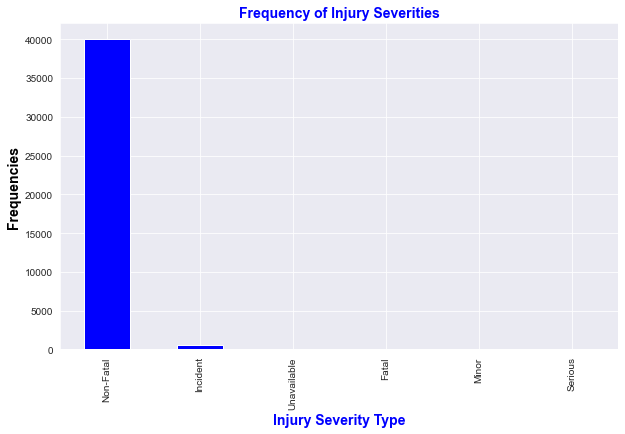

In [690]:
# 1. Which  Injury severity with the highest records
Injury_Severity_count = data['Injury_Severity'].value_counts()
Injury_Severity_count
#visuals
plt.figure(figsize= (10,6))
Injury_Severity_count.plot(kind='bar', color='blue')
xlabel='Injury_Severity'
plt.title('Frequency of Injury Severities', size=14,color= 'blue', weight='bold')
plt.ylabel('Frequencies', size=14,color= 'black', weight='bold')
plt.xlabel('Injury Severity Type', size=14,color= 'blue', weight='bold');

### Observation #1

Highest number of injury severity is Non Fatal type of injuries. 

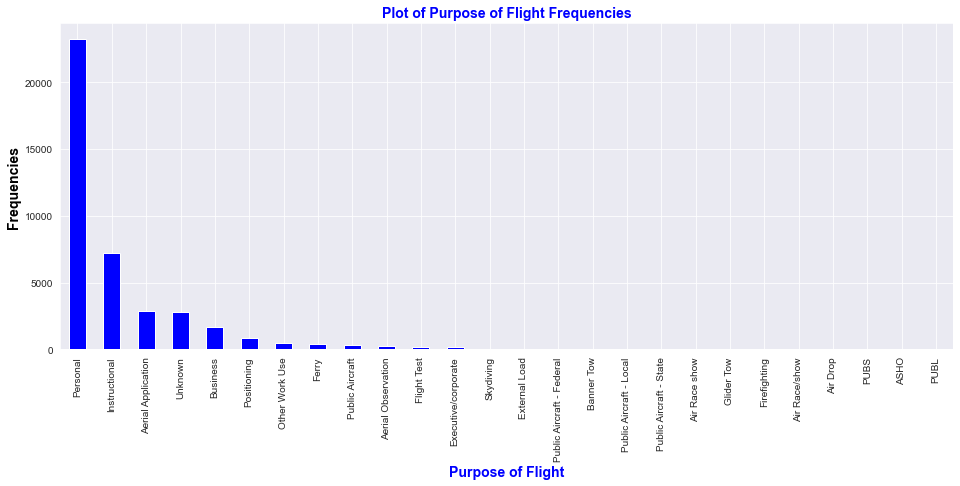

In [691]:
# Criteria 1: a) Check distribution of the purpose of flight.

purpose_of_flight_count = data['Purpose_Of_Flight'].value_counts()
purpose_of_flight_count

# Visual in a barplot
plt.figure(figsize= (16,6))
purpose_of_flight_count.plot(kind='bar', color='blue')
xlabel='Purpose_Of_Flight'
plt.title('Plot of Purpose of Flight Frequencies', size=14,color= 'blue', weight='bold')
plt.ylabel('Frequencies', size=14,color= 'black', weight='bold')
plt.xlabel('Purpose of Flight', size=14,color= 'blue', weight='bold');

### Observation #2

Flights  for personal or private purpose has the highest frequency. Making reference to the business case above that requires choice of aircrafts for business and private enterprise; I will deduct data in accordance with the two conditions (business or private(personal))

In [692]:
# Criteria 1: b) Selecting data based on business or private(personal) enterprises
df_purpose = data[data['Purpose_Of_Flight'].str.contains('Personal', case=False) | data['Purpose_Of_Flight'].str.contains('Business')] 
df_purpose.head()

,Event_Date,Investigation_Type,Location,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Broad_Phase_Of_Flight
0,1982-01-01,Accident,"PULLMAN, WA",Non-Fatal,Substantial,Airplane,Cessna,140,Personal,0.0,0.0,0.0,2.0,Takeoff
1,1982-01-01,Accident,"EAST HANOVER, NJ",Non-Fatal,Substantial,Airplane,Cessna,401B,Business,0.0,0.0,0.0,2.0,Landing
2,1982-01-01,Accident,"HOBBS, NM",Non-Fatal,Substantial,Unknown,Piper,PA-28-161,Personal,0.0,0.0,0.0,1.0,Approach
3,1982-01-01,Accident,"TUSKEGEE, AL",Non-Fatal,Substantial,Unknown,Beech,V35B,Personal,0.0,0.0,0.0,1.0,Landing
4,1982-01-02,Accident,"MIDWAY, UT",Non-Fatal,Destroyed,Helicopter,Enstrom,280C,Personal,0.0,0.0,0.0,1.0,Taxi


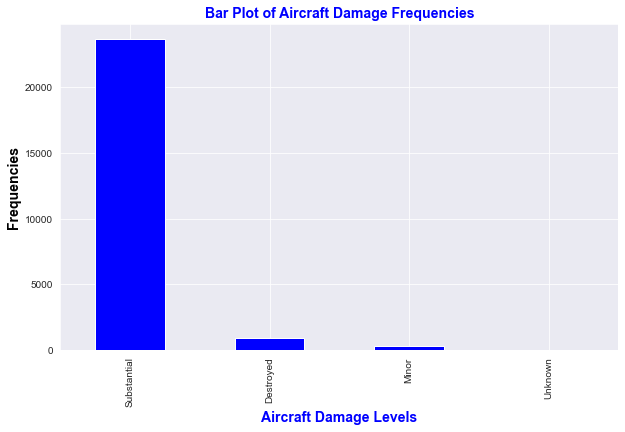

In [722]:
#Criteria 2: a) Risk1; Check degree of damage to aircraft and select the lowest
#Checking frequency distributions for each damage degree
plt.figure(figsize= (10,6))
df_purpose['Aircraft_Damage'].value_counts().plot(kind='bar', color='blue')
xlabel='Aircraft_Damage'
plt.title('Bar Plot of Aircraft Damage Frequencies', size=14,color= 'blue', weight='bold')
plt.ylabel('Frequencies', size=14,color= 'black', weight='bold')
plt.xlabel('Aircraft Damage Levels', size=14,color= 'blue', weight='bold');

### Observation #3

The aircrafts the are substantially damaged has the highest frequency. However, criteria of selection prefers aircrafts that in the event of an accident it sustains minor damages. Therefore, the select criteria follows 'Aircraft_Damage' feature with 'Minor' data values

In [694]:
#Criteria 2: b) Risk1; Check degree of damage to aircraft and select the lowest
#Selecting data with Minor from df_purpose dataframe
df_minor = df_purpose.query('Aircraft_Damage =="Minor"')
df_minor.head()

,Event_Date,Investigation_Type,Location,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Broad_Phase_Of_Flight
10,1982-01-03,Incident,"VAN NUYS, CA",Incident,Minor,Airplane,Piper,PA-24-180,Personal,0.0,0.0,0.0,1.0,Approach
13,1982-01-05,Incident,"PENSACOLA, FL",Incident,Minor,Airplane,Rockwell,114,Business,0.0,0.0,0.0,1.0,Cruise
89,1982-01-30,Incident,"TRUCKEE, CA",Incident,Minor,Airplane,Piper,PA-28R-201T,Personal,0.0,0.0,0.0,1.0,Landing
117,1982-02-06,Accident,"SAN JOSE, CA",Non-Fatal,Minor,Airplane,Bellanca,7KCAB,Personal,0.0,0.0,0.0,3.0,Standing
316,1982-03-20,Incident,"MOBILE, AL",Incident,Minor,Airplane,Cessna,172F,Personal,0.0,0.0,0.0,2.0,Landing


In [695]:
df_minor['Injury_Severity'].value_counts()

Non-Fatal    164
Incident     148
Fatal          2
Name: Injury_Severity, dtype: int64

In [696]:
# Criteria 3: Risk2; Severity of injuries inflicted to users
# Check and select data with lower risk to user(Non Fatal or Incident) from df_minor dataframe

df_low_risk = df_minor.query('Injury_Severity == ["Non-Fatal","Incident"]')
df_low_risk.head()

,Event_Date,Investigation_Type,Location,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Broad_Phase_Of_Flight
10,1982-01-03,Incident,"VAN NUYS, CA",Incident,Minor,Airplane,Piper,PA-24-180,Personal,0.0,0.0,0.0,1.0,Approach
13,1982-01-05,Incident,"PENSACOLA, FL",Incident,Minor,Airplane,Rockwell,114,Business,0.0,0.0,0.0,1.0,Cruise
89,1982-01-30,Incident,"TRUCKEE, CA",Incident,Minor,Airplane,Piper,PA-28R-201T,Personal,0.0,0.0,0.0,1.0,Landing
117,1982-02-06,Accident,"SAN JOSE, CA",Non-Fatal,Minor,Airplane,Bellanca,7KCAB,Personal,0.0,0.0,0.0,3.0,Standing
316,1982-03-20,Incident,"MOBILE, AL",Incident,Minor,Airplane,Cessna,172F,Personal,0.0,0.0,0.0,2.0,Landing


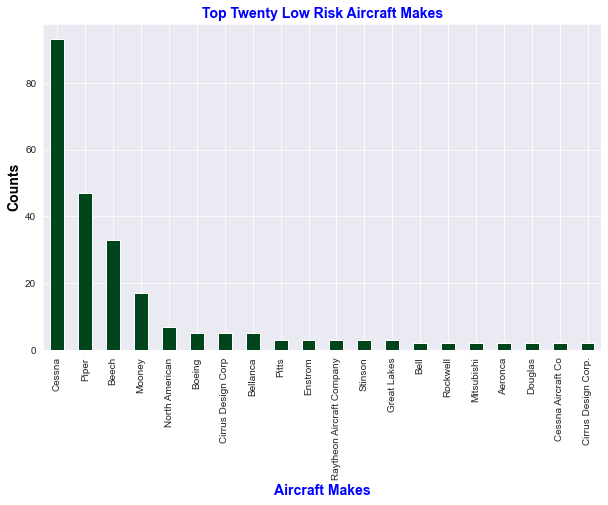

In [697]:
# Extract and visualize the top ten aircraft makes with low risk
#top twenty makes dataframe 
top_twenty_makes = df_low_risk['Make'].value_counts().head(20)

# Visualization
plt.figure(figsize=(10, 6))
top_twenty_makes.plot(kind='bar', colormap='Greens_r')
#Title
plt.title('Top Twenty Low Risk Aircraft Makes',size=14,color= 'blue', weight='bold')
# Name axes
plt.xlabel('Aircraft Makes',size=14,color= 'blue', weight='bold')
plt.ylabel('Counts',size=14,color= 'black', weight='bold');




### Observation #4

This visual shows top twenty low risk aircraft makes. It is observed that Cessna make has the highest frequency. Based on this criteria, it is safe to adduce that Cessna aircraft make in general is a low risk aircraft.

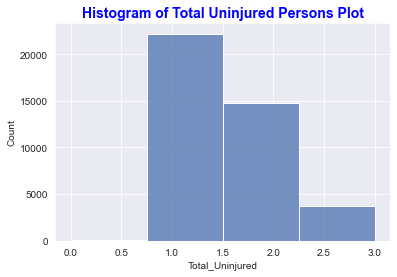

In [721]:
#hist plot for Total Uninjured  feature.
sns.histplot(x=data['Total_Uninjured'], bins=4)
plt.title('Histogram of Total Uninjured Persons Plot', fontsize=14, color='blue', weight='bold')
plt.show()

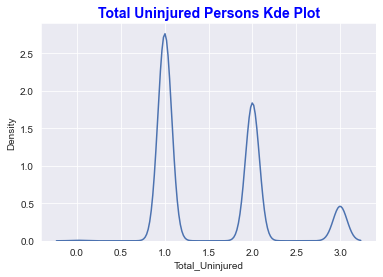

In [720]:
sns.kdeplot(x=data['Total_Uninjured'])
plt.title('Total Uninjured Persons Kde Plot', fontsize=14, color='blue', weight='bold')
plt.show()

In [700]:
df_low_risk.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Fatal_Injuries,312.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Total_Serious_Injuries,312.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Total_Minor_Injuries,312.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Total_Uninjured,312.0,1.903846,0.783913,0.0,1.0,2.0,3.0,3.0


## 5.2 Bivariate Analysis

This is the analysis of data to identify patterns, trends, and correlations of two variables in a given dataset. This can be achieved by use of bar plots, scatter plots, correlation coefficient and regression analysis


In [701]:
df_low_risk.head()

,Event_Date,Investigation_Type,Location,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Broad_Phase_Of_Flight
10,1982-01-03,Incident,"VAN NUYS, CA",Incident,Minor,Airplane,Piper,PA-24-180,Personal,0.0,0.0,0.0,1.0,Approach
13,1982-01-05,Incident,"PENSACOLA, FL",Incident,Minor,Airplane,Rockwell,114,Business,0.0,0.0,0.0,1.0,Cruise
89,1982-01-30,Incident,"TRUCKEE, CA",Incident,Minor,Airplane,Piper,PA-28R-201T,Personal,0.0,0.0,0.0,1.0,Landing
117,1982-02-06,Accident,"SAN JOSE, CA",Non-Fatal,Minor,Airplane,Bellanca,7KCAB,Personal,0.0,0.0,0.0,3.0,Standing
316,1982-03-20,Incident,"MOBILE, AL",Incident,Minor,Airplane,Cessna,172F,Personal,0.0,0.0,0.0,2.0,Landing


<Figure size 1152x720 with 0 Axes>

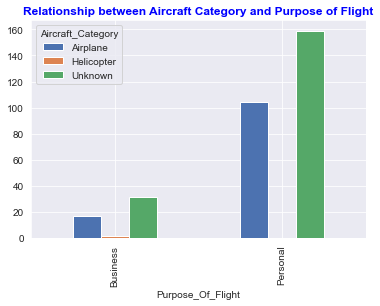

In [702]:
#Create a crosstab
Aircraft_purpose = pd.crosstab(df_low_risk['Purpose_Of_Flight'], df_low_risk['Aircraft_Category'])
Aircraft_purpose
#visualize barchart
plt.figure(figsize=(16,10))
Aircraft_purpose.plot(kind='bar')
plt.title('Relationship between Aircraft Category and Purpose of Flight', size=12, color='blue', weight='bold');

### Observation #1 

The Unknown aircraft category has the highest frequency being of private enterprise. The high frequencies of Unknown is as a result of imputing missing values by use of placeholder 'Unknown', this is interpreted to mean that the imputed values(missing values) were significant the dataset originally. It is evident that, there more low risk airplanes(approximately 85%) are operated for private(personal) enterprises compared to those in business enterprise. Low risk helicopters are mainly operated for business enterprises, and generally more airplanes are operated for business enterprises than the helicopters.

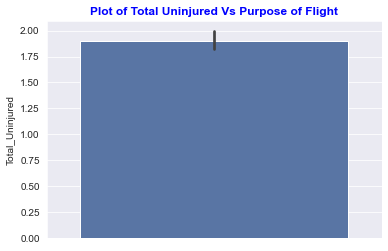

In [703]:
sns.barplot(y=df_low_risk['Total_Uninjured'], hue = df_low_risk['Purpose_Of_Flight'])
plt.title('Plot of Total Uninjured Vs Purpose of Flight', size=12, color='blue', weight='bold');


In [704]:
#selecting numerical variables only
df_nums = df_low_risk[['Total_Fatal_Injuries','Total_Serious_Injuries','Total_Minor_Injuries','Total_Uninjured']]

In [705]:
corr = df_nums.corr()
corr

,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
Total_Fatal_Injuries,NaN,NaN,NaN,NaN
Total_Serious_Injuries,NaN,NaN,NaN,NaN
Total_Minor_Injuries,NaN,NaN,NaN,NaN
Total_Uninjured,NaN,NaN,NaN,1.0


<AxesSubplot:>

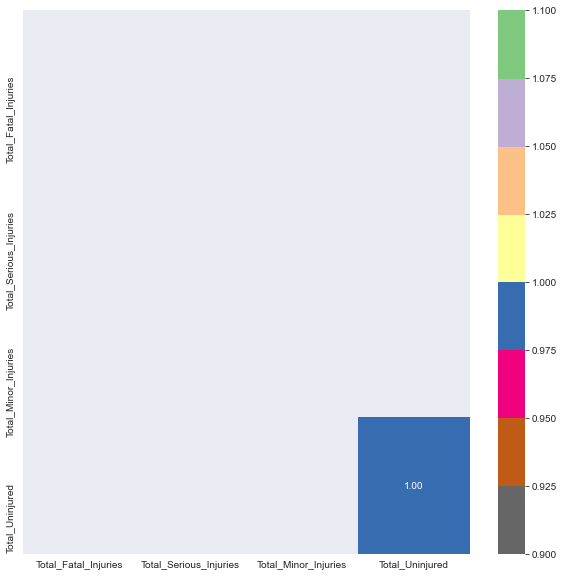

In [706]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f',cmap='Accent_r')

### Observation #2

There are no correlations between numerical variables in low risk dataframe (df_low_risk).

## 5.3 Multivariate Analayis

Multivariate analysis is a statistical technique used to describe and summarize patterns, trends, and correlations between three or more variables. It is achieved by deployement of various analysis techniques such as ;

** Multiple regression analysis

** Factor analysis

** Cluster analysis

** Discriminant analysis


In [707]:
#Select the top ten makes as per their frequencies
top_makes = df_low_risk['Make'].value_counts().nlargest(10).index

In [708]:
selected_df = df_low_risk[df_low_risk['Make'].isin(top_makes)]

In [709]:
selected_df.head()

,Event_Date,Investigation_Type,Location,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Broad_Phase_Of_Flight
10,1982-01-03,Incident,"VAN NUYS, CA",Incident,Minor,Airplane,Piper,PA-24-180,Personal,0.0,0.0,0.0,1.0,Approach
89,1982-01-30,Incident,"TRUCKEE, CA",Incident,Minor,Airplane,Piper,PA-28R-201T,Personal,0.0,0.0,0.0,1.0,Landing
117,1982-02-06,Accident,"SAN JOSE, CA",Non-Fatal,Minor,Airplane,Bellanca,7KCAB,Personal,0.0,0.0,0.0,3.0,Standing
316,1982-03-20,Incident,"MOBILE, AL",Incident,Minor,Airplane,Cessna,172F,Personal,0.0,0.0,0.0,2.0,Landing
470,1982-04-20,Incident,"COTTONWOOD FALL, KS",Incident,Minor,Airplane,Cessna,152,Personal,0.0,0.0,0.0,2.0,Takeoff


In [710]:
# Sort data using .groupby.
# This enables comparison of more than two variables
group_df = selected_df.groupby(["Purpose_Of_Flight", "Make", ])['Total_Uninjured'].sum().reset_index()

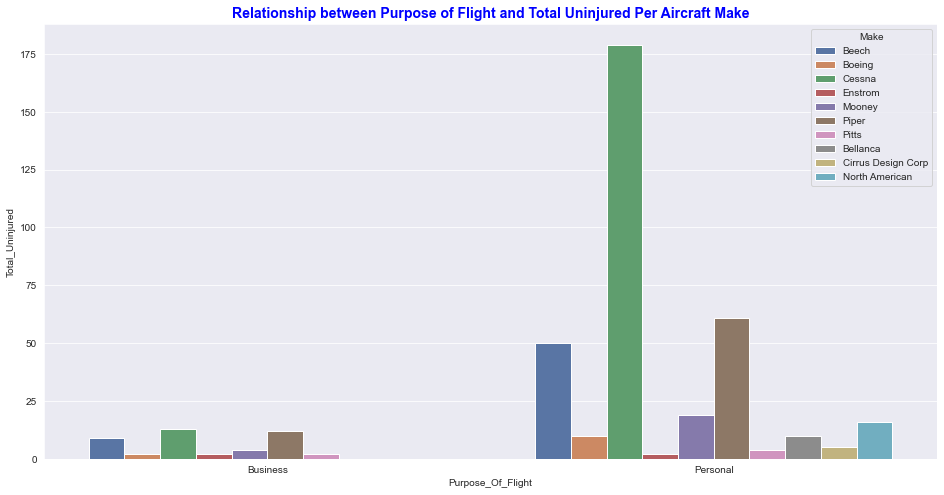

In [711]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.set_palette('deep')

sns.barplot(x='Purpose_Of_Flight', y= 'Total_Uninjured', hue='Make', data=group_df)
plt.title('Relationship between Purpose of Flight and Total Uninjured Per Aircraft Make', size=14, color='blue', weight='bold');


### Observation

It can be deduced that among the low risk aircraft makes Cessna,Pipper and Beech show in the event of and accident or an incident;

** The aircraft will, to a large extent, sustain 'minor' damages, and

** The users have higher probability of remaining uninjured.

Subsequently, it is observed from the number of persons uninjured that there are more in aircrafts operated for personal/private enterprise than in those operated for business enterprise.

Finally, data shows Cessna make proves to be safer to operate for business and private enterprises.